In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import (
    pull_metrics_from_wandb,
    filter_zero_d,
    fit_power_law,
    predict_power_law,
)

ENTITY = "stanford-mercury"
PROJECT = "marin"
RUNS = [
    "tootsie-scaling-512-81c36c",
    "tootsie-scaling-768-d17a90",
    "tootsie-scaling-1024-f4e4be",
    "tootsie-scaling-1536-e2a6d8",
    "tootsie-scaling-2048-72c648",
]

In [2]:
df = pull_metrics_from_wandb(
    runs=RUNS,
    metrics=["eval/paloma/c4_en/bpb", "throughput/total_tokens"],
    entity=ENTITY,
    project=PROJECT,
    summary_fields=["parameter_count"]
)

In [3]:
df

,eval/paloma/c4_en/bpb,throughput/total_tokens,run,parameter_count,step
0,3.755196,0.000000e+00,tootsie-scaling-512-81c36c,248791552,0
1,1.039921,4.194304e+10,tootsie-scaling-512-81c36c,248791552,1
2,1.024333,8.388608e+10,tootsie-scaling-512-81c36c,248791552,2
3,1.018965,1.258291e+11,tootsie-scaling-512-81c36c,248791552,3
4,1.013399,1.677722e+11,tootsie-scaling-512-81c36c,248791552,4
5,1.000790,2.097110e+11,tootsie-scaling-512-81c36c,248791552,5
6,3.763502,0.000000e+00,tootsie-scaling-768-d17a90,461267712,0
7,0.987020,4.194304e+10,tootsie-scaling-768-d17a90,461267712,1
8,0.969680,8.388608e+10,tootsie-scaling-768-d17a90,461267712,2
9,0.962653,1.258291e+11,tootsie-scaling-768-d17a90,461267712,3


In [4]:
N_raw = df["parameter_count"].values
D_raw = df["throughput/total_tokens"].values
y_raw = df["eval/paloma/c4_en/bpb"].values
N, D, y = filter_zero_d(N_raw, D_raw, y_raw)

In [5]:
params = fit_power_law(N, D, y, use_log_space=True)
A, B, alpha, beta, E = params
preds = predict_power_law(params, N, D)
mse = np.mean((y - preds)**2)

In [6]:
print("Fitted:", params)
print("MSE:", mse)

Fitted: (np.float64(1.0000000101527515), np.float64(0.9999999999666818), np.float64(0.9999999734633981), np.float64(1.0000000006447438), np.float64(0.9302114264750982))
MSE: 0.002955191933286147


In [8]:
preds

array([0.93021143, 0.93021143, 0.93021143, 0.93021143, 0.93021143,
       0.93021143, 0.93021143, 0.93021143, 0.93021143, 0.93021143,
       0.93021143, 0.93021143, 0.93021143, 0.93021143, 0.93021143,
       0.93021143, 0.93021143, 0.93021143, 0.93021143, 0.93021143,
       0.93021143, 0.93021143, 0.93021143])

In [9]:
print("y =", y)
print("preds =", preds)

for actual, pred in zip(y, preds):
    print(f"{actual:.4f}  ->  {pred:.4f}")

y = [1.03992105 1.02433276 1.01896524 1.01339889 1.00079024 0.98702013
 0.96968013 0.9626531  0.9577195  0.94924712 0.93868661 0.93021083
 0.9245671  0.91772169 0.92029053 0.90084755 0.8924098  0.8807596
 0.90359932 0.88121676 0.87281394 0.86664855 0.86092269]
preds = [0.93021143 0.93021143 0.93021143 0.93021143 0.93021143 0.93021143
 0.93021143 0.93021143 0.93021143 0.93021143 0.93021143 0.93021143
 0.93021143 0.93021143 0.93021143 0.93021143 0.93021143 0.93021143
 0.93021143 0.93021143 0.93021143 0.93021143 0.93021143]
1.0399  ->  0.9302
1.0243  ->  0.9302
1.0190  ->  0.9302
1.0134  ->  0.9302
1.0008  ->  0.9302
0.9870  ->  0.9302
0.9697  ->  0.9302
0.9627  ->  0.9302
0.9577  ->  0.9302
0.9492  ->  0.9302
0.9387  ->  0.9302
0.9302  ->  0.9302
0.9246  ->  0.9302
0.9177  ->  0.9302
0.9203  ->  0.9302
0.9008  ->  0.9302
0.8924  ->  0.9302
0.8808  ->  0.9302
0.9036  ->  0.9302
0.8812  ->  0.9302
0.8728  ->  0.9302
0.8666  ->  0.9302
0.8609  ->  0.9302


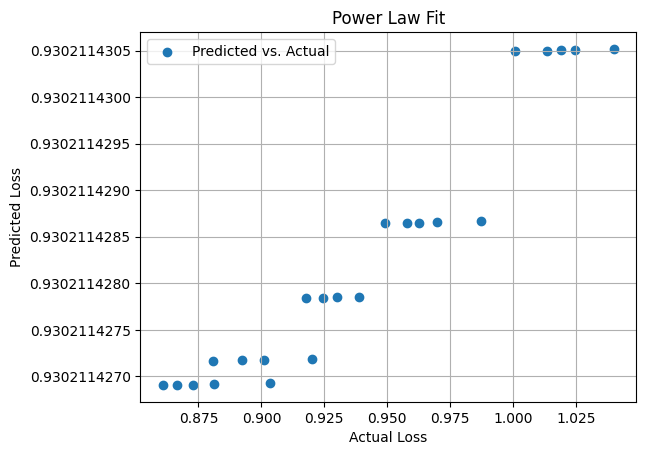

In [14]:
plt.scatter(y, preds, label="Predicted vs. Actual")
plt.xlabel("Actual Loss")
plt.ylabel("Predicted Loss")
plt.title("Power Law Fit")
plt.grid(True)
plt.ticklabel_format(useOffset=False)  # turns off the offset
plt.legend()
plt.show()

In [15]:
pred_run = "llama-8b-tootsie-0.001-19ad63"
pred_df = pull_metrics_from_wandb(
    runs=[pred_run],
    metrics=["eval/paloma/c4_en/bpb", "throughput/total_tokens"],
    entity=ENTITY,
    project=PROJECT,
    summary_fields=["parameter_count"]
)

In [17]:
Np_raw = pred_df["parameter_count"].values
Dp_raw = pred_df["throughput/total_tokens"].values
yp_raw = pred_df["eval/paloma/c4_en/bpb"].values
Np, Dp, yp = filter_zero_d(Np_raw, Dp_raw, yp_raw)
pred_yp = predict_power_law(params, Np, Dp)

In [18]:
for actual, pred_val in zip(yp, pred_yp):
    print(f"Actual: {actual:.4f}, Predicted: {pred_val:.4f}")

Actual: 0.8808, Predicted: 0.9302
Actual: 0.8488, Predicted: 0.9302
Actual: 0.8360, Predicted: 0.9302
Actual: 0.8281, Predicted: 0.9302
Actual: 0.8230, Predicted: 0.9302
Actual: 0.8188, Predicted: 0.9302
Actual: 0.8164, Predicted: 0.9302
Actual: 0.8137, Predicted: 0.9302
Actual: 0.8122, Predicted: 0.9302
Actual: 0.8108, Predicted: 0.9302
Actual: 0.8088, Predicted: 0.9302
Actual: 0.8080, Predicted: 0.9302
Actual: 0.8067, Predicted: 0.9302
Actual: 0.8062, Predicted: 0.9302
Actual: 0.8052, Predicted: 0.9302
Actual: 0.8046, Predicted: 0.9302
Actual: 0.8036, Predicted: 0.9302
Actual: 0.8024, Predicted: 0.9302
Actual: 0.8018, Predicted: 0.9302
Actual: 0.8009, Predicted: 0.9302
Actual: 0.8012, Predicted: 0.9302
Actual: 0.8002, Predicted: 0.9302
Actual: 0.7999, Predicted: 0.9302
Actual: 0.8000, Predicted: 0.9302
Actual: 0.7989, Predicted: 0.9302
Actual: 0.7998, Predicted: 0.9302
Actual: 0.7990, Predicted: 0.9302
Actual: 0.7980, Predicted: 0.9302
Actual: 0.7974, Predicted: 0.9302
Actual: 0.7976